<a href="https://colab.research.google.com/github/guptaa98/Kaggle-Notebooks/blob/master/Dogs_vs_Cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [13]:
cat = cv2.imread('/content/drive/My Drive/CATS_DOGS/train/CAT/4.jpg')

In [14]:
print(cat)

[[[123 129 140]
  [124 130 141]
  [127 133 144]
  ...
  [164 164 170]
  [171 171 177]
  [178 178 184]]

 [[123 129 140]
  [124 130 141]
  [127 133 144]
  ...
  [160 163 168]
  [167 167 173]
  [170 173 178]]

 [[123 129 140]
  [124 130 141]
  [127 133 144]
  ...
  [155 159 164]
  [158 161 166]
  [159 163 168]]

 ...

 [[124 144 155]
  [ 78  98 109]
  [ 37  54  63]
  ...
  [ 15  17   5]
  [ 15  17   5]
  [ 16  18   6]]

 [[118 138 149]
  [ 77  97 108]
  [ 38  55  64]
  ...
  [ 14  16   4]
  [ 15  17   5]
  [ 16  18   6]]

 [[ 50  70  81]
  [ 26  46  57]
  [  3  20  29]
  ...
  [ 15  17   5]
  [ 16  18   6]
  [ 17  19   7]]]


In [16]:
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

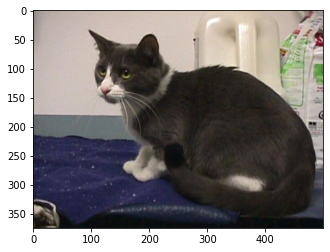

In [17]:
plt.imshow(cat)

In [18]:
cat.shape

(375, 500, 3)

In [19]:
dog = cv2.imread('/content/drive/My Drive/CATS_DOGS/train/DOG/4.jpg')

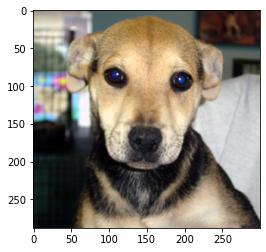

In [20]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [21]:
dog.shape

(288, 300, 3)

In [22]:
from keras.preprocessing.image import ImageDataGenerator 

In [24]:
image_gen = ImageDataGenerator(rotation_range = 20, 
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               fill_mode = 'nearest'
                               )

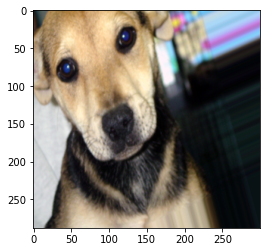

In [27]:
plt.imshow(image_gen.random_transform(dog))

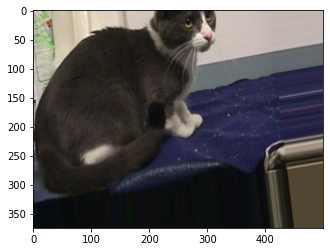

In [90]:
plt.imshow(image_gen.random_transform(cat))

In [29]:
image_gen.flow_from_directory('/content/drive/My Drive/CATS_DOGS/train')

Found 18773 images belonging to 2 classes.


In [33]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D,Dense

In [34]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(3,3),strides=(1,1),input_shape = (150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=(1,1),input_shape = (150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size=(3,3),strides=(1,1),input_shape = (150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128,kernel_size=(3,3),strides=(1,1),input_shape = (150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [37]:
input_shape = (150,150,3)

In [47]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('/content/drive/My Drive/CATS_DOGS/train',
                                                target_size = input_shape[:2],
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 18773 images belonging to 2 classes.


In [48]:
batch_size = 16
val_image_gen = image_gen.flow_from_directory('/content/drive/My Drive/CATS_DOGS/validation',
                                                target_size = input_shape[:2],
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [49]:
batch_size = 16
test_image_gen = image_gen.flow_from_directory('/content/drive/My Drive/CATS_DOGS/test',
                                                target_size = input_shape[:2],
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [50]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [55]:
results = model.fit_generator(train_image_gen,epochs = 50, steps_per_epoch = 100, validation_data=val_image_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 41s 416ms/step - loss: 0.5942 - accuracy: 0.6850 - val_loss: 0.5697 - val_accuracy: 0.7130
Epoch 2/50
100/100 [==============================] - 39s 388ms/step - loss: 0.5644 - accuracy: 0.7067 - val_loss: 0.5433 - val_accuracy: 0.7290
Epoch 3/50
100/100 [==============================] - 38s 386ms/step - loss: 0.5635 - accuracy: 0.7113 - val_loss: 0.5733 - val_accuracy: 0.7040
Epoch 4/50
100/100 [==============================] - 36s 364ms/step - loss: 0.5543 - accuracy: 0.7231 - val_loss: 0.5286 - val_accuracy: 0.7480
Epoch 5/50
100/100 [==============================] - 37s 373ms/step - loss: 0.5706 - accuracy: 0.7069 - val_loss: 0.5358 - val_accuracy: 0.7330
Epoch 6/50
100/100 [==============================] - 37s 372ms/step - loss: 0.5495 - accuracy: 0.7269 - val_loss: 0.5174 - val_accuracy: 0.7470
Epoch 7/50
100/100 [==============================] - 35s 349ms/step - loss: 0.5646 - accuracy: 0.7031 - val_loss: 0.5723 - val_ac

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 29s 294ms/step - loss: 0.5270 - accuracy: 0.7425 - val_loss: 0.5066 - val_accuracy: 0.7490
Epoch 21/50
100/100 [==============================] - 29s 293ms/step - loss: 0.4957 - accuracy: 0.7663 - val_loss: 0.5244 - val_accuracy: 0.7490
Epoch 22/50
100/100 [==============================] - 27s 274ms/step - loss: 0.5105 - accuracy: 0.7494 - val_loss: 0.5047 - val_accuracy: 0.7590
Epoch 23/50
100/100 [==============================] - 27s 269ms/step - loss: 0.5172 - accuracy: 0.7475 - val_loss: 0.4735 - val_accuracy: 0.7690
Epoch 24/50
100/100 [==============================] - 27s 266ms/step - loss: 0.4963 - accuracy: 0.7669 - val_loss: 0.4986 - val_accuracy: 0.7750
Epoch 25/50
100/100 [==============================] - 28s 277ms/step - loss: 0.5107 - accuracy: 0.7575 - val_loss: 0.4917 - val_accuracy: 0.7590
Epoch 26/50
100/100 [==============================] - 28s 276ms/step - loss: 0.4963 - accuracy: 0.7563 - val_loss: 0.5016 - val_accurac

In [56]:
print ("a")

a


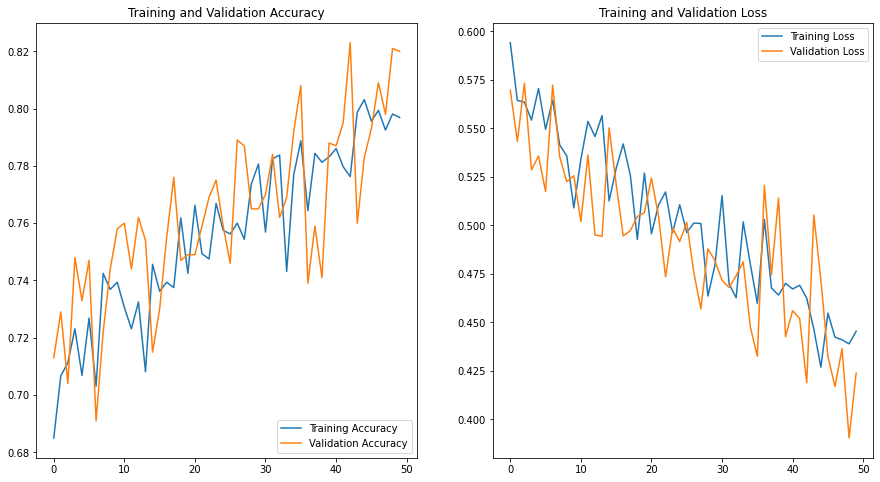

In [60]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:
len(test_image_gen.filenames)

6251

In [63]:
predict = model.predict_generator(test_image_gen,steps = len(test_image_gen.filenames))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [66]:
predict

array([[0.48312184],
       [0.7721346 ],
       [0.04803345],
       ...,
       [0.72175723],
       [0.94529366],
       [0.7869868 ]], dtype=float32)

In [70]:
#y_true = []
#prediction_test = []
#for step in range(6251):
 #   X, y = test_image_gen.next()
  #  y_true.append(y)
   # prediction = model.predict(X)
    #prediction_test.append(prediction)

In [82]:
new_img = '/content/drive/My Drive/CATS_DOGS/test/DOG/9380.jpg'
from keras.preprocessing import image
img = image.load_img(new_img,target_size = (150,150))
img = image.img_to_array(img)
img.shape

(150, 150, 3)

In [83]:
import numpy as np
img = np.expand_dims(img,axis=0)
img.shape

(1, 150, 150, 3)

In [84]:
img = img/255

In [88]:
model.predict_on_batch(img)

array([[0.5068494]], dtype=float32)